# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np

In [3]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [4]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')

In [6]:
# Extract all rows of data
rows_data = soup.find_all("tr", class_="data-row")

print(rows_data)

[<tr class="data-row">
<td>2</td>
<td>2012-08-16</td>
<td>10</td>
<td>155</td>
<td>6</td>
<td>-75.0</td>
<td>739.0</td>
</tr>, <tr class="data-row">
<td>13</td>
<td>2012-08-17</td>
<td>11</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>24</td>
<td>2012-08-18</td>
<td>12</td>
<td>156</td>
<td>6</td>
<td>-76.0</td>
<td>741.0</td>
</tr>, <tr class="data-row">
<td>35</td>
<td>2012-08-19</td>
<td>13</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>732.0</td>
</tr>, <tr class="data-row">
<td>46</td>
<td>2012-08-20</td>
<td>14</td>
<td>157</td>
<td>6</td>
<td>-74.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>57</td>
<td>2012-08-21</td>
<td>15</td>
<td>158</td>
<td>6</td>
<td>-78.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>68</td>
<td>2012-08-22</td>
<td>16</td>
<td>158</td>
<td>6</td>
<td>-77.0</td>
<td>740.0</td>
</tr>, <tr class="data-row">
<td>79</td>
<td>2012-08-23</td>
<td>17</td>
<td>159</td>
<td>6</td>
<td>-76.0</td>
<td>74

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list
mars_data = []

# Loop through the scraped data to create a list of rows
for row in rows_data:
    id = row.find_all("td")[0].text
    t_date = row.find_all("td")[1].text
    sol = row.find_all("td")[2].text
    ls = row.find_all("td")[3].text
    month = row.find_all("td")[4].text
    min_temp = row.find_all("td")[5].text
    pressure = row.find_all("td")[6].text
    mars_dict = {
        "Id":id,
        "Terrestrial_date":t_date,
        "Sol":sol,
        "Ls":ls,
        "Month":month,
        "Min_temp":min_temp,
        "Pressure":pressure
    }
    mars_data.append(mars_dict)


mars_data

[{'Id': '2',
  'Terrestrial_date': '2012-08-16',
  'Sol': '10',
  'Ls': '155',
  'Month': '6',
  'Min_temp': '-75.0',
  'Pressure': '739.0'},
 {'Id': '13',
  'Terrestrial_date': '2012-08-17',
  'Sol': '11',
  'Ls': '156',
  'Month': '6',
  'Min_temp': '-76.0',
  'Pressure': '740.0'},
 {'Id': '24',
  'Terrestrial_date': '2012-08-18',
  'Sol': '12',
  'Ls': '156',
  'Month': '6',
  'Min_temp': '-76.0',
  'Pressure': '741.0'},
 {'Id': '35',
  'Terrestrial_date': '2012-08-19',
  'Sol': '13',
  'Ls': '157',
  'Month': '6',
  'Min_temp': '-74.0',
  'Pressure': '732.0'},
 {'Id': '46',
  'Terrestrial_date': '2012-08-20',
  'Sol': '14',
  'Ls': '157',
  'Month': '6',
  'Min_temp': '-74.0',
  'Pressure': '740.0'},
 {'Id': '57',
  'Terrestrial_date': '2012-08-21',
  'Sol': '15',
  'Ls': '158',
  'Month': '6',
  'Min_temp': '-78.0',
  'Pressure': '740.0'},
 {'Id': '68',
  'Terrestrial_date': '2012-08-22',
  'Sol': '16',
  'Ls': '158',
  'Month': '6',
  'Min_temp': '-77.0',
  'Pressure': '740.0'},


In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df=pd.DataFrame(mars_data)

In [9]:
# Confirm DataFrame was created successfully
mars_df.head()

,Id,Terrestrial_date,Sol,Ls,Month,Min_temp,Pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [10]:
# Examine data type of each column
# mars_df.info()
for column_name, dtype in mars_df.dtypes.items():
    print(f'{column_name:20} {str(dtype)}')

Id                   object
Terrestrial_date     object
Sol                  object
Ls                   object
Month                object
Min_temp             object
Pressure             object


In [11]:
# Change data types for data analysis
mars_df["Terrestrial_date"] = pd.to_datetime(mars_df["Terrestrial_date"])
mars_df["Sol"] = np.int64(mars_df["Sol"])
mars_df["Ls"] = np.int64(mars_df["Ls"])
mars_df["Month"] = np.int64(mars_df["Month"])
mars_df["Min_temp"] = mars_df["Min_temp"].astype(float)
mars_df["Pressure"] = mars_df["Pressure"].astype(float)


In [12]:
# Confirm type changes were successful by examining data types again
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Id                1867 non-null   object        
 1   Terrestrial_date  1867 non-null   datetime64[ns]
 2   Sol               1867 non-null   int64         
 3   Ls                1867 non-null   int64         
 4   Month             1867 non-null   int64         
 5   Min_temp          1867 non-null   float64       
 6   Pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 102.2+ KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
month_counts = mars_df["Month"].value_counts()
month_counts.sort_index()


1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: Month, dtype: int64

In [14]:
# 2. How many Martian days' worth of data are there?
mars_df["Terrestrial_date"].count()

1867

In [15]:
# 3. What is the average low temperature by month?
average_low_by_month = mars_df.groupby("Month")["Min_temp"].mean()
average_low_by_month = average_low_by_month.reset_index()
average_low_by_month

,Month,Min_temp
0,1,-77.160920
1,2,-79.932584
2,3,-83.307292
3,4,-82.747423
4,5,-79.308725
5,6,-75.299320
6,7,-72.281690
7,8,-68.382979
8,9,-69.171642
9,10,-71.982143


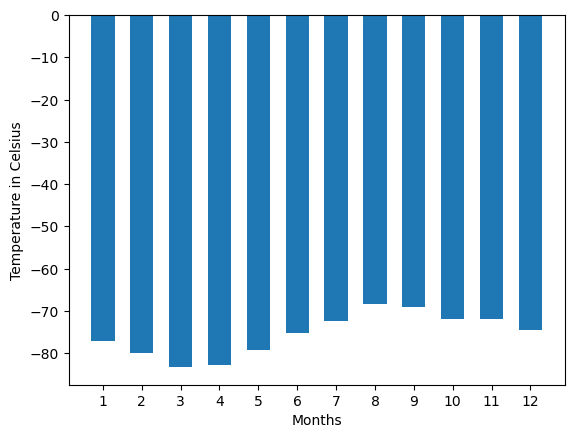

In [16]:
# Plot the average temperature by month
plt.bar(average_low_by_month["Month"], average_low_by_month["Min_temp"], width=0.6)
plt.xlabel("Months")
plt.xticks(average_low_by_month['Month'])
plt.ylabel("Temperature in Celsius")
plt.show()

In [17]:
ascending_temps =  average_low_by_month.sort_values(by='Min_temp')
ascending_temps

,Month,Min_temp
2,3,-83.307292
3,4,-82.747423
1,2,-79.932584
4,5,-79.308725
0,1,-77.160920
5,6,-75.299320
11,12,-74.451807
6,7,-72.281690
10,11,-71.985507
9,10,-71.982143


In [18]:
# In order to getting the plot sorted ascending by temperatures, I create values arange 
# with the appropriate order
values = ascending_temps["Month"].astype(str).to_numpy()
values


array(['3', '4', '2', '5', '1', '6', '12', '7', '11', '10', '9', '8'],
      dtype=object)

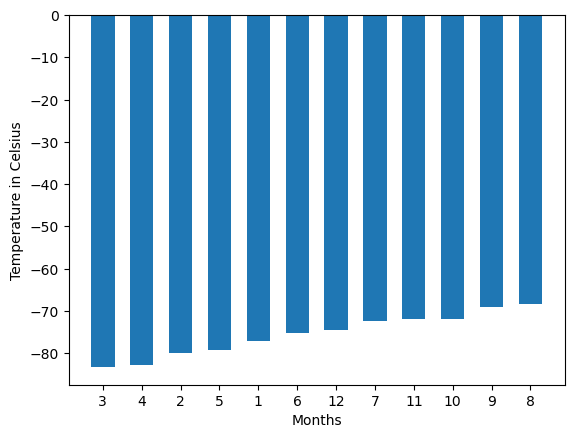

The coldest month in curiosity's location is: 3 with a min temp of -83.30729166666667
The hottest month in curiosity's location is: 8 with a max temp of -68.38297872340425


In [19]:
# Identify the coldest and hottest months in Curiosity's location
plt.bar(values, ascending_temps["Min_temp"], width=0.6)
plt.xlabel("Months")
plt.xticks(values)
plt.ylabel("Temperature in Celsius")
plt.show()


print(f'The coldest month in curiosity\'s location is: {values[0]} with a min temp of {ascending_temps["Min_temp"].min()}')
print(f'The hottest month in curiosity\'s location is: {values[-1]} with a max temp of {ascending_temps["Min_temp"].max()}')

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



In [20]:
# 4. Average pressure by Martian month
pressure_by_month = mars_df.groupby("Month")["Pressure"].mean()
# pressure_by_month
pressure_by_month = pressure_by_month.reset_index()
pressure_by_month

,Month,Pressure
0,1,862.488506
1,2,889.455056
2,3,877.322917
3,4,806.329897
4,5,748.557047
5,6,745.054422
6,7,795.105634
7,8,873.829787
8,9,913.305970
9,10,887.312500


In [21]:
ascending_pressures=  pressure_by_month.sort_values(by='Pressure')
ascending_pressures

,Month,Pressure
5,6,745.054422
4,5,748.557047
6,7,795.105634
3,4,806.329897
11,12,842.156627
10,11,857.014493
0,1,862.488506
7,8,873.829787
2,3,877.322917
9,10,887.312500


In [22]:
# In order to getting the plot sorted ascending by pressure, I create press arange 
# with the appropriate order
press = ascending_pressures["Month"].astype(str).to_numpy()
press

array(['6', '5', '7', '4', '12', '11', '1', '8', '3', '10', '2', '9'],
      dtype=object)

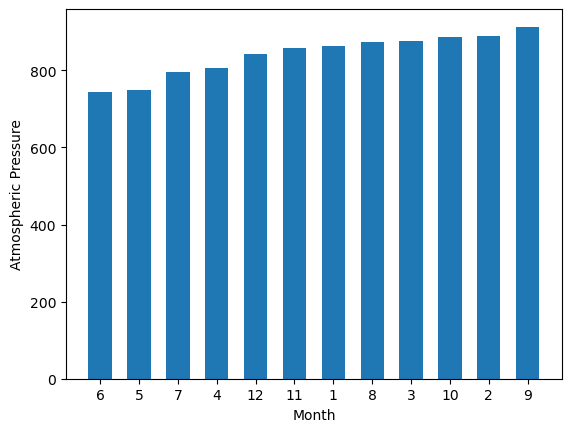

In [23]:
# Plot the average pressure by month
plt.bar(press, ascending_pressures["Pressure"], width=0.6)
plt.xlabel("Month")
plt.xticks(press)
plt.ylabel("Atmospheric Pressure")
plt.show()

Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

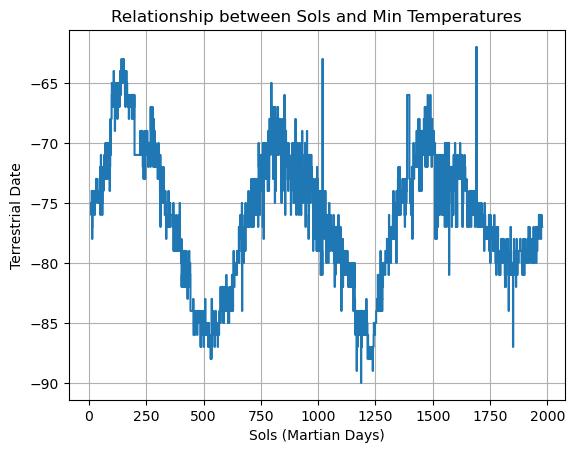

In [31]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# I didn't knew how to get that, all I got was 0.97 or something like that with my attempts.

plt.step(mars_df['Sol'], mars_df['Min_temp'], alpha=1)
plt.xlabel('Sols (Martian Days)')
plt.ylabel('Terrestrial Date')
plt.title('Relationship between Sols and Min Temperatures')
plt.grid(True)

# Show the plot
plt.show()

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [27]:
# Write the data to a CSV
mars_df.to_csv("mars_data.csv")


In [28]:
browser.quit()